# Capítulo 10 – Introdução às Redes Neurais Artificiais com Keras

#### Estes códigos foram reproduzidos no Google Colab (recomenda-se o uso do Google Colab para reprodução integal)

## Configuração

In [94]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Importações comuns
import numpy as np
import os

# para fazer esse notebook ter resultados repetíveis
np.random.seed(42)

# para plotar figuras
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."

## Neurônios biológicos

Célula encontrada principalmente no córtex cerebral

* Composto de um corpo celular contendo o núcleo e a maioria dos componentes complexos da célula e muitas extensões de ramificação chamadas dendritos, além de uma extensão muito longa chamada de axônio

* Os terminais sinápticos se conectam aos dendritos de outros neurônios

* Recebem sinais pelas sinapses

* Os neurônios biológicos recebem curtos impulsos elétricos de outros neurônios através dessas sinapses chamadas sinais.

* Quando recebem sinais suficientes eles disparam seus sinais

* Quando um neurônio recebe um número suficiente de sinais de outros neurônios em alguns milissegundos, ele dispara seus próprios sinais

![image](https://i.imgur.com/iGaody9.png)

* Neurônios biológicos são organizados em uma rede de bilhões de neurônios conectados

* Cálculos altamente complexos podem ser realizados por uma vasta rede de neurônios bem simples, muito parecida com um formigueiro complexo que surge dos esforços combinados de simples formigas.

* Algumas partes do cérebro foram mapeadas e parece que os neurônios muitas vezes são organizados em camadas consecutivas, como mostrado na Figura abaixo.

![image](https://i.imgur.com/DG2FTaJ.png)

## Perceptrons

* Inventado em 1957 por Frank Rosenblatt

* O Perceptron é uma das mais simples arquiteturas RNA.

* Usa um neurônio do tipo Linear Threshold Unit (LTU)

![image](https://i.imgur.com/yncrihU.png)

A LTU calcula

* uma soma ponderada de suas entradas (𝑧 = 𝑤_1 𝑥_1 + 𝑤_2 𝑥_2 + ⋯ + 𝑤_𝑛  𝑥_𝑛 = 𝑤^𝑇. 𝑥)

* então aplica uma função degrau a esta soma e gera o resultado ℎ_𝑤 *(𝑥)= 𝑠𝑡𝑒𝑝(𝑧) em que 𝑧 = 𝑤^𝑇

* Treinar significa encontrar o pesos ideais.

O Perceptron é composto por uma camada de LTUs como na figura abaixo.

![image](https://i.imgur.com/tGMF1GX.png)

O Perceptron é treinado com base na regra de Hebb


* reforçando conexões que levam a previsões corretas

* enfraquecendo conexões que levam a previsões incorretas

### Experimentando o Perceptron

#### O dataset Iris

![image](https://i.imgur.com/qETsWGF.png)

In [95]:
from sklearn.datasets import load_iris

Características:

* comprimento de sepala em cm

* largura de sepala em cm

* comprimento de petala em cm

* largura de petala em cm 

Classes:

* Iris-Setosa

* Iris-Versicolour

* Iris-Virginica


Número de instâncias = 150 (50 por classe)


In [96]:
iris = load_iris();

In [97]:
dados = iris["data"];
alvos = iris["target"];
nomesAlvo = iris["target_names"];
nomesCaracteristicas = iris["feature_names"];

In [98]:
nomesAlvo

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [99]:
nomesCaracteristicas

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [100]:
dados

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [101]:
alvos

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [102]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

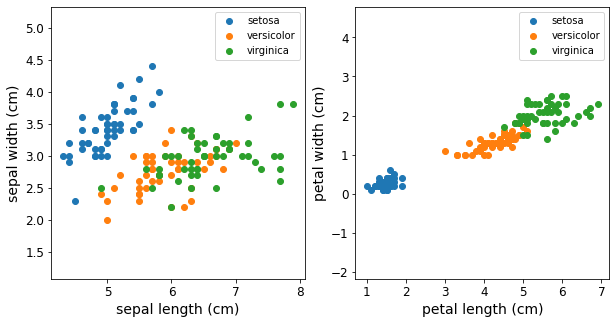

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
for contador, nome in enumerate(nomesAlvo):
  x_plot = dados[ alvos == contador]
  plt.plot(x_plot[:,0], x_plot[:,1], linestyle='none', marker='o', label=nome);

plt.xlabel(nomesCaracteristicas[0]);
plt.ylabel(nomesCaracteristicas[1]);
plt.axis('equal');
plt.legend();

plt.subplot(1, 2, 2)
for contador, nome in enumerate(nomesAlvo):
  x_plot = dados[ alvos == contador]
  plt.plot(x_plot[:,2], x_plot[:,3], linestyle='none', marker='o', label=nome);

plt.xlabel(nomesCaracteristicas[2]);
plt.ylabel(nomesCaracteristicas[3]);
plt.axis('equal');
plt.legend();

#### Classificação Binária

Experimentando Perceptron com duas entradas e uma saída (2 Classes)

In [104]:
# Vamos simplificar e usar apenas comprimento da pétala e largura da pétala
dadosReduzidos = dados[:, (2, 3)] # petal length, petal width
dadosReduzidos

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [105]:
len(dados)

150

In [106]:
alvos

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [107]:
# Uma LTU só faz classificação binária
classeAlvo = 0 # iris setosa
alvos == classeAlvo # Iris setosa?

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [108]:
# Conversão de lógico para inteiro (true --> 1; false --> 0)
alvoBinario = (alvos == classeAlvo).astype(int) # Iris setosa?
alvoBinario

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [109]:
# importando e treinando o Perceptron
from sklearn.linear_model import Perceptron
classificadorPerceptron = Perceptron()
classificadorPerceptron.fit(dadosReduzidos, alvoBinario) # atributos de entrada e atributo alvo

Perceptron()

In [110]:
# Predizendo uma nova amostra (iris setosa)
y_pred = classificadorPerceptron.predict([[1.5, 0.5]])
if (y_pred):
  print ("iris setosa")
else:
  print ("outra flor")

iris setosa


In [111]:
# Predizendo uma nova amostra (prevendo outra flor)
y_pred = classificadorPerceptron.predict([[4, 1]])
if (y_pred):
  print ("iris setosa")
else:
  print ("outra flor")

outra flor


Observando a matriz de pesos das conexões de entrada das LTU

In [112]:
classificadorPerceptron.coef_ # matriz de pesos de entrada

array([[-0.7, -1.2]])

Observando o peso de vies (entre o neuronio de vies e os neuronios LTU)

In [113]:
classificadorPerceptron.intercept_ # matriz de pesos de vies

array([2.])

Avaliando o Perceptron vendo o score com dados de treino

In [114]:
classificadorPerceptron.score(dadosReduzidos,alvoBinario)

1.0

#### Classificação Multiclasse (Multioutput)

Testando o Perceptron com 2 entradas e 3 saídas (3 classes). Usando apenas comprimento da pétala e largura da pétala


In [115]:
np.unique(alvos) # valores unicos da classe alvo

array([0, 1, 2])

In [116]:
classificadorPerceptron = Perceptron()
classificadorPerceptron.fit(dadosReduzidos, alvos)

Perceptron()

In [117]:
# Predizendo uma nova amostra (setosa)
y_pred = classificadorPerceptron.predict([[1.5, 0.5]])
if (y_pred==0):
  print ("iris setosa")
elif (y_pred==1):
  print ("iris versicolor")
else:
  print ("iris virginica")

iris setosa


In [118]:
# Predizendo uma nova amostra (versicolor)
y_pred = classificadorPerceptron.predict([[4, 1]])
if (y_pred==0):
  print ("iris setosa")
elif (y_pred==1):
  print ("iris versicolor")
else:
  print ("iris virginica")

iris versicolor


In [119]:
# Predizendo uma nova amostra (virginica)
y_pred = classificadorPerceptron.predict([[6, 2]])
if (y_pred==0):
  print ("iris setosa")
elif (y_pred==1):
  print ("iris versicolor")
else:
  print ("iris virginica")

iris virginica


Observando a matriz de pesos das conexões de entrada das LTU

In [120]:
classificadorPerceptron.coef_ # 2 entradas, 3 saídas

array([[ -2. ,  -3.6],
       [  7.5, -17.6],
       [  1.6,  31.1]])

Observando o peso de vies (entre o neuronio de vies e os neuronios LTU)

In [121]:
classificadorPerceptron.intercept_ # matriz de pesos de vies

array([  7.,  -9., -52.])

Avaliando o Perceptron vendo o score com dados de treino

In [122]:
classificadorPerceptron.score(dadosReduzidos,alvos)

0.8733333333333333

#### Atividade

Testar o Perceptron com 4 entradas e 3 saídas.


#### Resposta: 4 entradas e 3 saídas

In [123]:
dados.shape

(150, 4)

In [124]:
# importando e treinando
per_clf = Perceptron()
per_clf.fit(dados, alvos) 

Perceptron()

### Problemas com o Perceptron 

Em 1969, Marvin Minsky e Seymour Papert destacaram um número de sérias fraquezas dos Perceptrons, em particular o fato de serem incapazes de resolver alguns problemas triviais (por exemplo, o problema de classificação Exclusive OR (XOR).


*   Isso é verdade para qualquer outro modelo de classificação linear (como classificadores de regressão logística), mas os pesquisadores esperavam muito mais dos Perceptrons, e alguns ficaram tão desapontados que abandonaram as redes neurais completamente em favor de problemas de nível superior, como lógica, resolução de problemas e pesquisa. 


*   Começou um inverno de IA 



A tabela verdade do XOR 

![image](https://i.imgur.com/XI5Hpli.png)

Os cientistas preferiram se concentrar em outros classificadores como o SVM.

In [125]:
# os cientistas preferiram se concentrar em outros classificadores como o SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC # support vector classifier
from sklearn.svm import LinearSVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(dados, alvos) 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [126]:
clf.score(dados,alvos) 

0.9733333333333334

### O perceptron multicamadas (rede neural) 

Entretanto, algumas das suas limitações podem ser eliminadas ao empilharmos vários Perceptrons. A RNA resultante é chamada de Perceptron Multicamada (MLP). Em particular, como você pode verificar, a MLP pode resolver o problema XOR calculando a saída MLP representada à direita da Figura abaixo. 

![image](https://i.imgur.com/rNruRZ9.png)

![image](https://i.imgur.com/Gayj1Fo.png)

## Outras funções de ativação 

A função Step não tem derivada, então ela limitava o Perceptron. Outras funções podem lidar com problemas não lineares.

![image](https://i.imgur.com/OTFyxqA.png)

### Experimentando Rede Neural (antes de maiores detalhes) 

In [127]:
import tensorflow
from tensorflow import keras

In [128]:
dados = iris["data"];
alvos = iris["target"];
nomesAlvo = iris["target_names"];
nomesCaracteristicas = iris["feature_names"];

In [129]:
qtd_saida = len(nomesAlvo); # numero de classes
qtd_entrada = len(nomesCaracteristicas);  # numero de caracteristicas 

In [130]:
# Escalonando as características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dados) 

In [131]:
# dividindo o conjunto de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, alvos, test_size=0.33, random_state=42)

In [132]:
# Definindo a arquitetura da rede MLP 
# Unidades de saída, unidades de entrada, função de ativação 
modelo = keras.Sequential([
  keras.layers.Dense(16, input_dim=qtd_entrada, activation='relu'),
  keras.layers.Dense(qtd_saida, activation='softmax')
])

In [133]:
modelo.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                80        
                                                                 
 dense_9 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


#### Outra forma de construir o modelo 

In [134]:
# Definindo a arquitetura da rede MLP
# Unidades de saída, unidades de entrada, função de ativação
modelo = keras.Sequential(name ='modelo1')
modelo.add(keras.layers.Dense(8, input_dim=qtd_entrada,activation='relu'))
modelo.add(keras.layers.Dense(qtd_saida, activation='softmax')) 

In [135]:
modelo.compile(loss='sparse_categorical_crossentropy',
  optimizer="sgd",
  metrics=['accuracy']
) 

**Em Keras os argumentos de configuração importantes são os seguintes:**

* **Número de neurônios/unidades na camada**  

* **Função de ativação** (activation) - a função de ativação é uma função especial usada para descobrir se um neurônio específico está ativado ou não. Basicamente, a função de ativação faz uma transformação não linear dos dados de entrada e, assim, permite que os neurônios aprendam melhor. A saída de um neurônio depende da função de ativação (*relu*, *sigmoid*, *tanh*, *exponential*, *softmax*).

* **Função de Perda (loss)** - a função Loss é usada para encontrar erros ou desvios no processo de aprendizado (*mean_squared_error*, *mean_absolute_error*, *categorical_crossentropy*, *sparse_categorical_crossentropy*, *binary_crossentropy*)

* **Otimizador (optimizer)** - a otimização é um processo importante que otimiza os pesos de entrada comparando a previsão e a função de perda (*sgd*, *rmsprop*, *adagrad*, *adadelta*, *adam*, *adamax*, *nadam*). 

* **Métricas (metrics)** - as métricas são usadas para avaliar o desempenho do seu modelo. É semelhante à função de perda, mas não é usada no processo de treinamento (*accuracy*, *binary_accuracy*, *categorical_accuracy*, *sparse_categorical_accuracy*). 

**Observação**

* Se estivéssemos fazendo **classificação binária** (com um ou mais rótulos binários), usaríamos a função de ativação "**sigmoid**" (ou seja, logística) na camada de saída e usaríamos a função de perda "**binary_crossentropy**". 

* Se estivéssemos fazendo **classificação multiclasse**, usaríamos a função de ativação "**softmax**” e a função de perda "**sparse_categorical_crossentropy**' ou "**categorical_crossentropy**’. 

* Usamos a função de perda "**sparse_categorical_crossentropy**" porque temos rótulos esparsos (ou seja, para cada instância, há apenas um índice de classe de destino, de 0 a 2 neste caso), e as **classes são exclusivas**. 

* Se, em vez disso, tivéssemos uma probabilidade alvo por classe para cada instância (como vetores one-hot, por exemplo, [0., 0., 1.] para representar a classe 3), então precisaríamos usar a função de perda “**categorical_crossentropy**”. 

In [136]:
 # Treinando o Modelo
historico = modelo.fit(X_train, y_train, epochs=200, validation_split=0.2) 

Epoch 1/200
3/3 [==============================] - 0s 83ms/step - loss: 1.2414 - accuracy: 0.2000 - val_loss: 1.2556 - val_accuracy: 0.1000
Epoch 2/200
3/3 [==============================] - 0s 24ms/step - loss: 1.2093 - accuracy: 0.2250 - val_loss: 1.2326 - val_accuracy: 0.1000
Epoch 3/200
3/3 [==============================] - 0s 14ms/step - loss: 1.1788 - accuracy: 0.2500 - val_loss: 1.2106 - val_accuracy: 0.1500
Epoch 4/200
3/3 [==============================] - 0s 40ms/step - loss: 1.1477 - accuracy: 0.3125 - val_loss: 1.1886 - val_accuracy: 0.1500
Epoch 5/200
3/3 [==============================] - 0s 13ms/step - loss: 1.1190 - accuracy: 0.4000 - val_loss: 1.1671 - val_accuracy: 0.2000
Epoch 6/200
3/3 [==============================] - 0s 13ms/step - loss: 1.0917 - accuracy: 0.4375 - val_loss: 1.1474 - val_accuracy: 0.2000
Epoch 7/200
3/3 [==============================] - 0s 12ms/step - loss: 1.0658 - accuracy: 0.4750 - val_loss: 1.1283 - val_accuracy: 0.2500
Epoch 8/200
3/3 [===

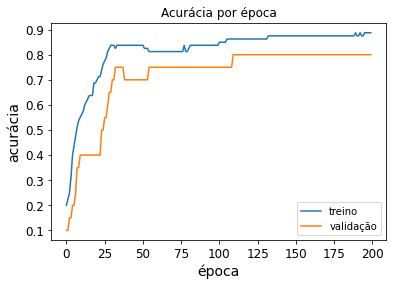

In [137]:
# Construindo o Gráfico
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('época' )
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

In [138]:
# Avaliando o modelo
perda_teste, acuracia_teste = modelo.evaluate(X_test, y_test)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste) 

2/2 [==============================] - 0s 5ms/step - loss: 0.3698 - accuracy: 0.8400
Perda do teste: 0.36984583735466003
Acurácia do teste: 0.8399999737739563
